## Importing the libraries

In [37]:
# Importing the libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

In [101]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 195 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


## Part 2 - Building the CNN

In [100]:
# Initialising the CNN
model_mrl_cnn = tf.keras.models.Sequential()

# Adding a first convolutional layer
model_mrl_cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model_mrl_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
model_mrl_cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model_mrl_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a Third convolutional layer
model_mrl_cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model_mrl_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
model_mrl_cnn.add(tf.keras.layers.Flatten())

from keras.regularizers import l2

# Step 4 - Full Connection
model_mrl_cnn.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_regularizer=l2(0.2)))

# Step 5 - Output Layer
model_mrl_cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_mrl_cnn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 6, 6, 128)      

## Part 3 - Training the CNN

In [102]:
# Compiling the CNN
model_mrl_cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
model_mrl_cnn.fit(x = training_set, validation_data = test_set, epochs = 50, verbose=2)

Epoch 1/50
7/7 - 2s - loss: 39.4814 - accuracy: 0.6615 - val_loss: 26.9712 - val_accuracy: 0.5000 - 2s/epoch - 285ms/step
Epoch 2/50
7/7 - 1s - loss: 20.7302 - accuracy: 0.6564 - val_loss: 12.9156 - val_accuracy: 0.5000 - 883ms/epoch - 126ms/step
Epoch 3/50
7/7 - 1s - loss: 9.6417 - accuracy: 0.6462 - val_loss: 5.5137 - val_accuracy: 0.6897 - 817ms/epoch - 117ms/step
Epoch 4/50
7/7 - 1s - loss: 3.9339 - accuracy: 0.6462 - val_loss: 2.3346 - val_accuracy: 0.5345 - 879ms/epoch - 126ms/step
Epoch 5/50
7/7 - 1s - loss: 1.7261 - accuracy: 0.6564 - val_loss: 1.1692 - val_accuracy: 0.8276 - 877ms/epoch - 125ms/step
Epoch 6/50
7/7 - 1s - loss: 1.0028 - accuracy: 0.7231 - val_loss: 0.8779 - val_accuracy: 0.7069 - 921ms/epoch - 132ms/step
Epoch 7/50
7/7 - 1s - loss: 0.8115 - accuracy: 0.6821 - val_loss: 0.7649 - val_accuracy: 0.7586 - 857ms/epoch - 122ms/step
Epoch 8/50
7/7 - 1s - loss: 0.7716 - accuracy: 0.6974 - val_loss: 0.9369 - val_accuracy: 0.5345 - 827ms/epoch - 118ms/step
Epoch 9/50
7/7 

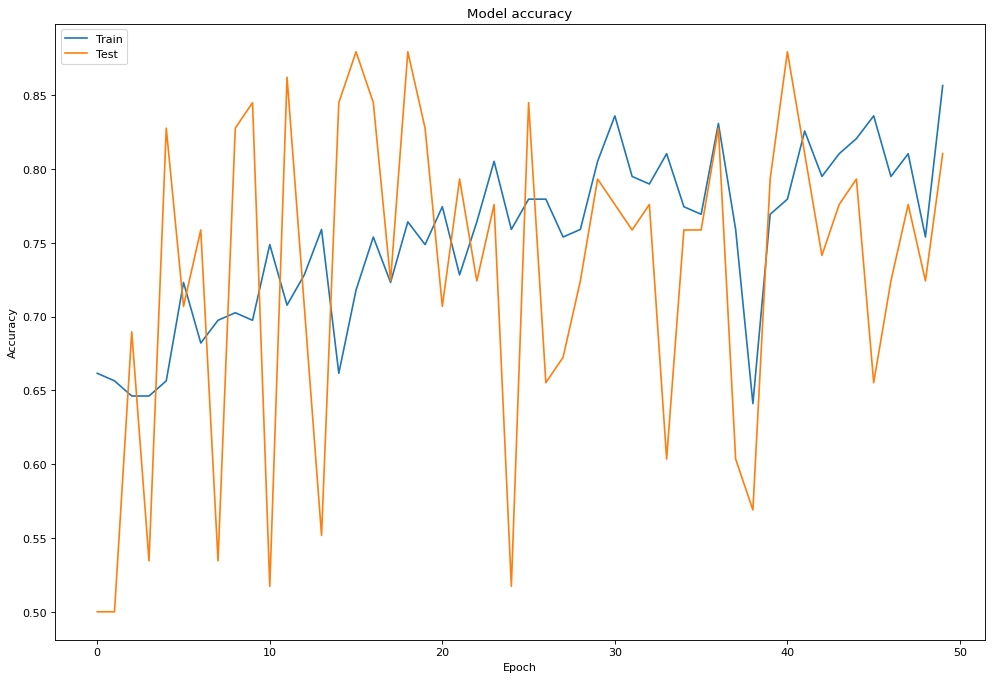

In [103]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

plt.plot(model_mrl_cnn.history.history['accuracy'])
plt.plot(model_mrl_cnn.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

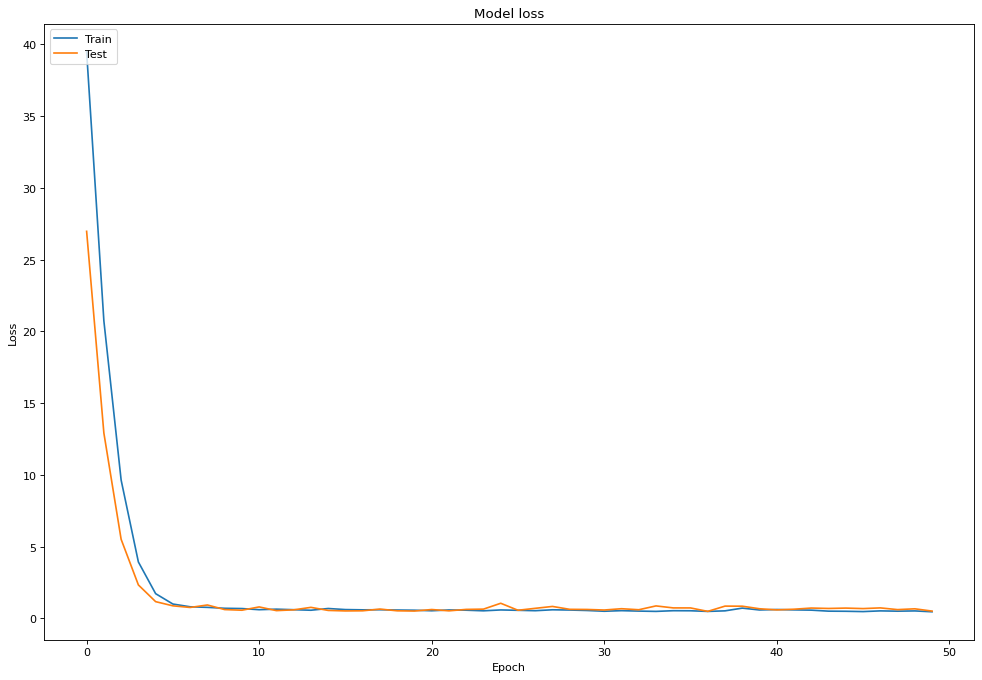

<Figure size 640x480 with 0 Axes>

In [104]:
figure(figsize=(15, 10), dpi=80)
fig1 = plt.gcf()

plt.plot(model_mrl_cnn.history.history['loss']) 
plt.plot(model_mrl_cnn.history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()
plt.draw()

## Part 4 - Making a single prediction

In [105]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/yes_or_no3.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model_mrl_cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'yes'
else:
    prediction = 'no'
print(prediction)

yes


In [106]:
from ann_visualizer.visualize import ann_viz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

ann_viz(model_mrl_cnn, title="")
model_mrl_cnn.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [107]:
model_mrl_cnn.load_weights('model.h5')
score = model_mrl_cnn.evaluate(test_set,verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])

2/2 [==============================] - 0s 71ms/step - loss: 0.5116 - accuracy: 0.8103
Valid loss: 0.5115918517112732
Valid acc: 0.8103448152542114
